# SC1015 Project Work
*********

## A) Importing all the libraries/modules + Creating DataFrame
***

#### Imports Libraries
***

In [20]:
#-----Standard Import
import numpy as np
import pandas as pd

#-----For Plotting Graphs
import seaborn as sb
import matplotlib.pyplot as plt 
import plotly.express as px

#-----Sklearn modules etc for datas
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint






#### Read Datas From CSV
***

In [21]:
dData = pd.read_csv('diabetes_prediction_dataset.csv')  #Read From The CSV file

In [22]:
dData.dtypes     

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

From the dtypes function above, we can conclude that of all variables:

   >- Gender, Hyper Tension, Heart Disease,Smoking History and Diabetes are considered as Categorical Datas 
   
   >- Age, Bmi , HbA1c Level and Blood Glucose Level is considered as Numerical Data

In [23]:
dData.shape

(100000, 9)

From shape function we can tell the size of data:
   > 1)Size = 100000,Column = 9

##  B) Cleaning of Data
***
In this section we plan to check for outliers and null values that are useless for out data and clean it so that it will be more accurate

### Checking for Null values
***

   >We first check for null data sets that are to be removed or replaced

In [24]:
null_columns = dData.columns[dData.isnull().any()]
print(dData[null_columns].isnull().sum())

Series([], dtype: float64)


We noticed that there were no null data that was to be cleaned or replaced 

### Checking for range of Numerical Data Set 
***
   > By checking for min and max value across these datas we want to understand the dataset better and ensure that the values are scientifically possible, eliminating any possible human errors

In [25]:
# Check for lowest value
lowest_value1 = dData['age'].min()
lowest_value2 = dData['bmi'].min()
lowest_value3 = dData['HbA1c_level'].min()
lowest_value4 = dData['blood_glucose_level'].min()
print()


# Print the lowest value
print("The lowest value in the 'age' column is:", lowest_value1)
print("The lowest value in the 'bmi' column is:", lowest_value2)
print("The lowest value in the 'HbA1c_level' column is:", lowest_value3)
print("The lowest value in the 'blood_glucose_level' column is:", lowest_value4)
print()

# Check for highest value
highest_value1 = dData['age'].max()
highest_value2 = dData['bmi'].max()
highest_value3 = dData['HbA1c_level'].max()
highest_value4 = dData['blood_glucose_level'].max()

# Print the highest value
print("The highest value in the 'age' column is:", highest_value1)
print("The highest value in the 'bmi' column is:", highest_value2)
print("The highest value in the 'HbA1c_level' column is:", highest_value3)
print("The highest value in the 'blood_glucose_level' column is:", highest_value4)
print("")

#For Categorical Data, we need to check the total number to catergories per variable
print("The amount of unique values in the 'gender' column is: ", len(dData['gender'].unique()))
print("The amount of unique values in the 'hypertension' column is: ", len(dData['hypertension'].unique()))
print("The amount of unique values in the 'heart_disease' column is: ", len(dData['heart_disease'].unique()))
print("The amount of unique values in the 'smoking_history' column is: ", len(dData['smoking_history'].unique()))
print("The amount of unique values in the 'diabetes' column is: ", len(dData['diabetes'].unique()))



The lowest value in the 'age' column is: 0.08
The lowest value in the 'bmi' column is: 10.01
The lowest value in the 'HbA1c_level' column is: 3.5
The lowest value in the 'blood_glucose_level' column is: 80

The highest value in the 'age' column is: 80.0
The highest value in the 'bmi' column is: 95.69
The highest value in the 'HbA1c_level' column is: 9.0
The highest value in the 'blood_glucose_level' column is: 300

The amount of unique values in the 'gender' column is:  3
The amount of unique values in the 'hypertension' column is:  2
The amount of unique values in the 'heart_disease' column is:  2
The amount of unique values in the 'smoking_history' column is:  6
The amount of unique values in the 'diabetes' column is:  2


While the extreme ends of the data may seem unimaginable, through further corroboration with online sources, we have come to the conclusion that all these ranges of values for the respective predictors are possible. For example the data that seems to stand out - the minimum age of 0.08 translated to a 29 days newborn. Through pure observation of this dataset only, it is hard to believe that a newborn could be a part of this dataset but upon online research, the range of blood glucose level for a 4 weeks newborn is 70 to 150mg/dL which falls within the range of the predictor blood glucose level.

### Cleaning outliers from data
***
 > For all numerical datas, we have decided to visualise the datas through a boxplot to identify the outliers and remove them as part of data cleaning
    

#### BMI distribution
***

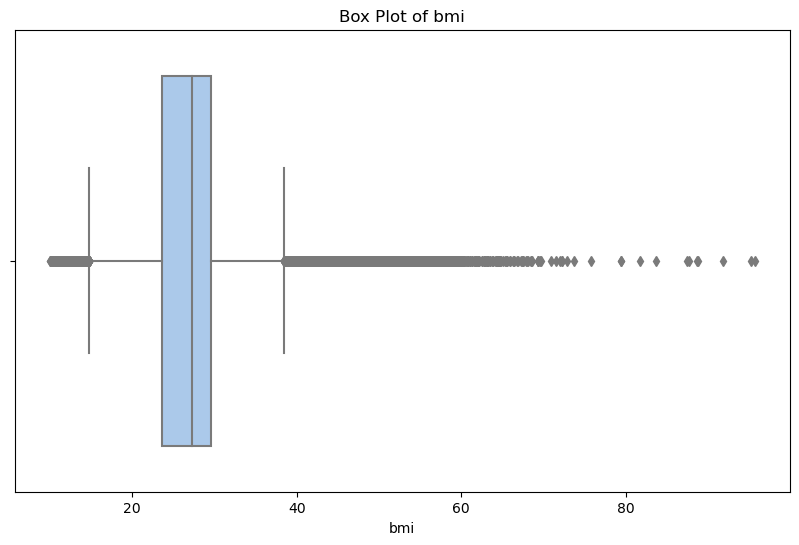

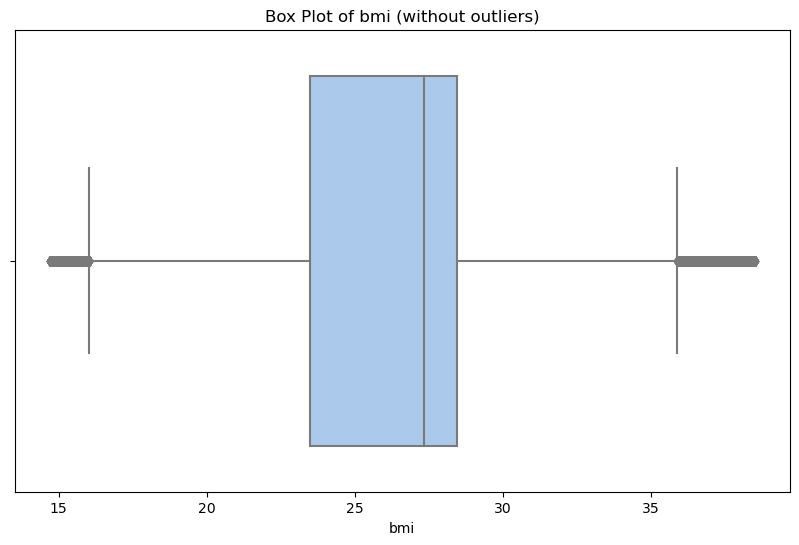

In [26]:
# Create BoxPLOT 
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["bmi"], palette="pastel")
plt.xlabel("bmi")
plt.title("Box Plot of bmi")

# Defining and cleaning outliers
Q1 = dData["bmi"].quantile(0.25)
Q3 = dData["bmi"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dData = dData[(dData["bmi"] >= lower_bound) & (dData["bmi"] <= upper_bound)]

# Create a boxplot of the cleaned data
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["bmi"], palette="pastel")
plt.xlabel("bmi")
plt.title("Box Plot of bmi (without outliers)")

plt.show()

#### HbA1c_Level Distribution
***

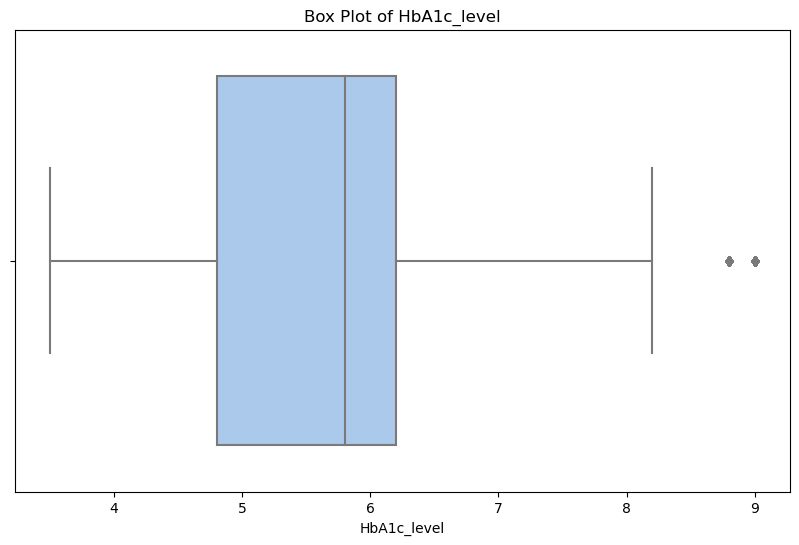

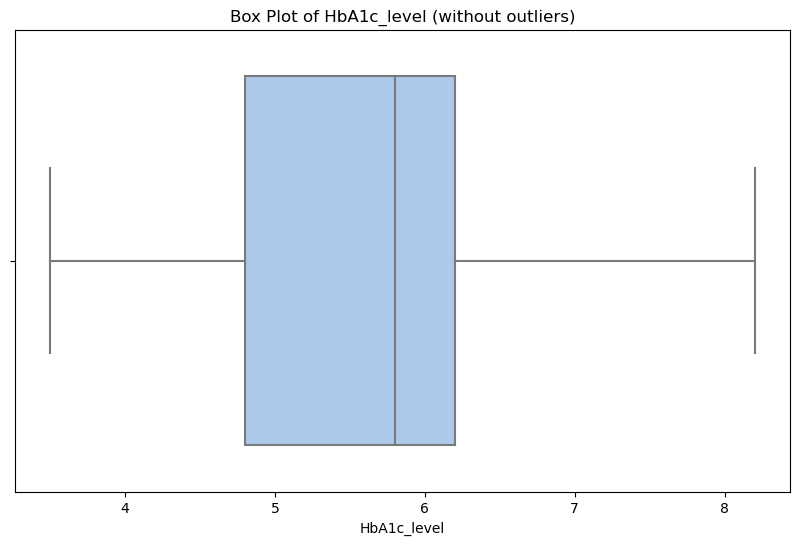

In [27]:
# Create a Boxplot
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["HbA1c_level"], palette="pastel")
plt.xlabel("HbA1c_level")
plt.title("Box Plot of HbA1c_level")

# Defining and Cleaning the data
Q1 = dData["HbA1c_level"].quantile(0.25)
Q3 = dData["HbA1c_level"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dData = dData[(dData["HbA1c_level"] >= lower_bound) & (dData["HbA1c_level"] <= upper_bound)]

# Create a boxplot of the cleaned data
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["HbA1c_level"], palette="pastel")
plt.xlabel("HbA1c_level")
plt.title("Box Plot of HbA1c_level (without outliers)")

plt.show()

#### Blood_Glucose_Level Distribution
***

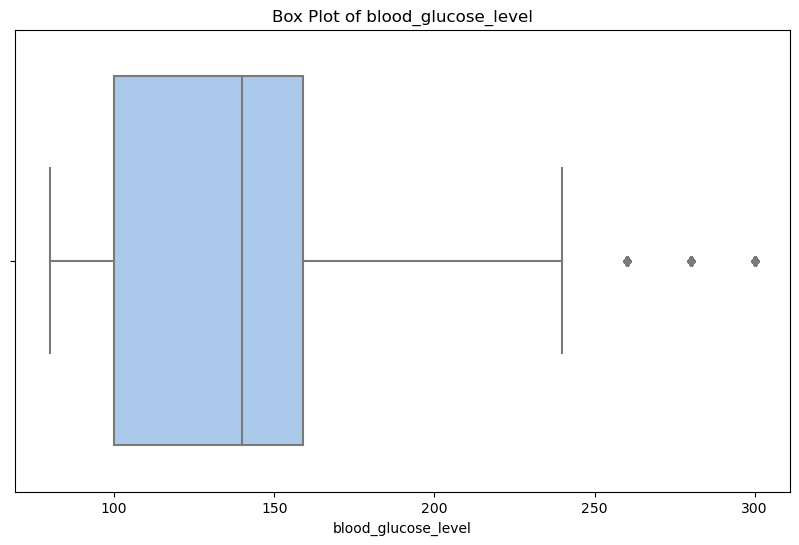

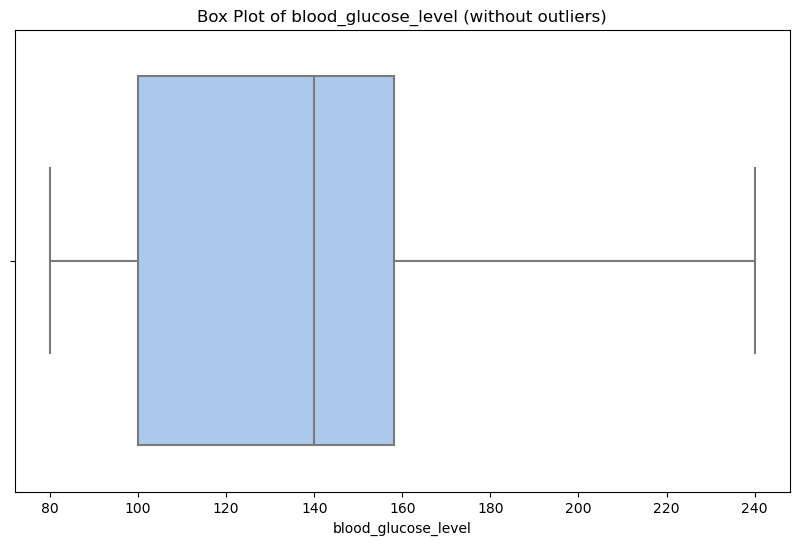

In [28]:
# Create a boxplot of the original data
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["blood_glucose_level"], palette="pastel")
plt.xlabel("blood_glucose_level")
plt.title("Box Plot of blood_glucose_level")

# Defining and cleaning outliers
Q1 = dData["blood_glucose_level"].quantile(0.25)
Q3 = dData["blood_glucose_level"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dData = dData[(dData["blood_glucose_level"] >= lower_bound) & (dData["blood_glucose_level"] <= upper_bound)]

# Create a boxplot of the cleaned data
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["blood_glucose_level"], palette="pastel")
plt.xlabel("blood_glucose_level")
plt.title("Box Plot of blood_glucose_level (without outliers)")

plt.show()

#### Age Distribution
***

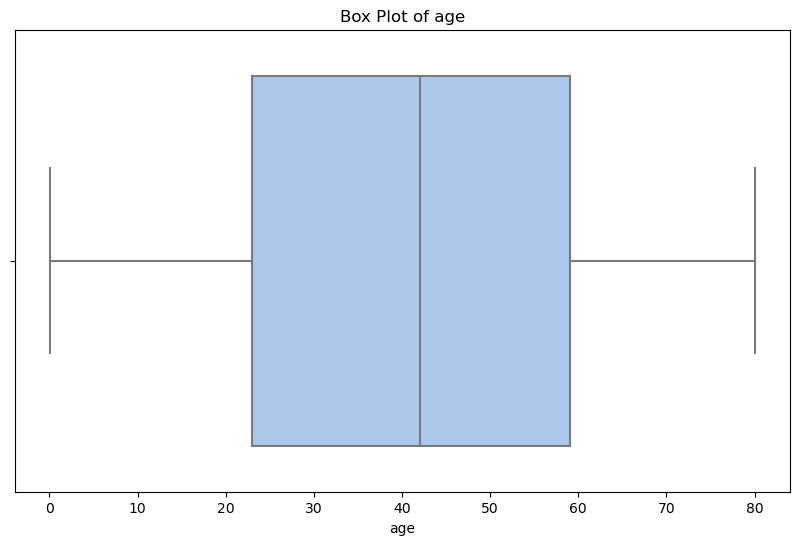

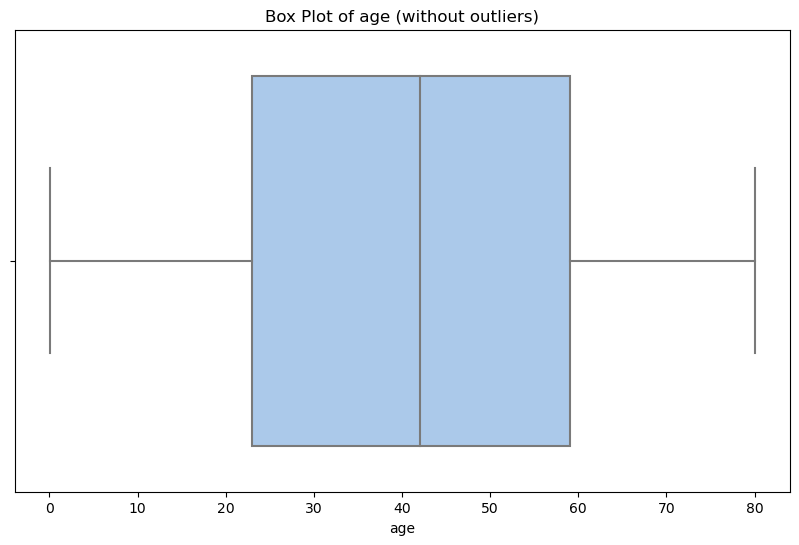

In [29]:
# Create a boxplot of the original data
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["age"], palette="pastel")
plt.xlabel("age")
plt.title("Box Plot of age")

# Defining and cleaning outliers
Q1 = dData["age"].quantile(0.25)
Q3 = dData["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dData = dData[(dData["age"] >= lower_bound) & (dData["age"] <= upper_bound)]

# Create a boxplot of the cleaned data
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["age"], palette="pastel")
plt.xlabel("age")
plt.title("Box Plot of age (without outliers)")

plt.show()

## B) Visualisation of data after first cleaning and observing trends
***
   >This enables us to further understand our data and pick out potential predictors. We want to find the distribution of people with diabetes within our dataset and the different variables leading to the possible different percentages of distribution across the dataset's variables.

#### Distribution of Diabetes
***
 >In this case we chose to do bar graph to show the contrast of the data with 0 signifying non-diabetics and 1 diabetics. We use the module plotly as our visualisation tool, a tool new to us to create a bargraph for improved and more insightful visualisation.

In [ ]:
# Get Count
diabetes_counts = dData['diabetes'].value_counts()

# Create a bar graph
fig = px.bar(x=diabetes_counts.index, y=diabetes_counts.values, text=diabetes_counts.values,
             labels={'x': 'Diabetes Status', 'y': 'Count'}, color=diabetes_counts.index)
fig.update_layout(title='Distribution of Diabetes')

fig.show()

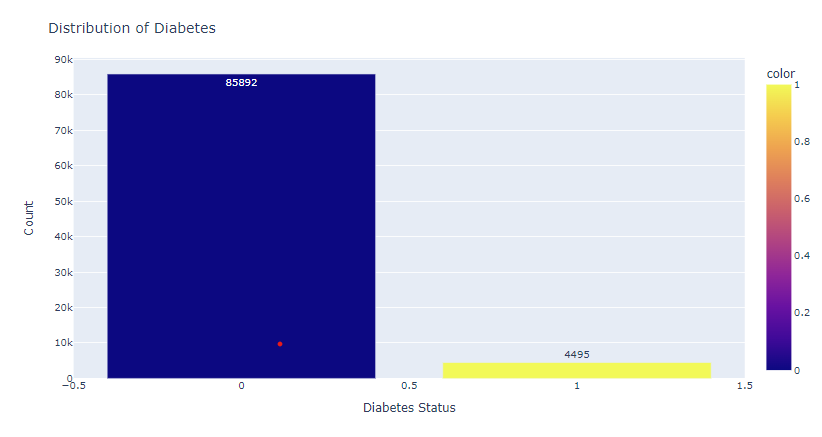

We see that non-diabetics make up 95% of the dataset.

#### Gender vs Diabetes
***
 >We want to find the distribution of diabetes among the genders therefore we used plotly in a similar manner as above. We improved the visualisation by adding the percentages that aid in comparison. We repeat this for the other predictors.

In [ ]:
# calculate counts and percentages
counts = dData.groupby(['gender', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# create a stacked bar chart with percentage labels
fig = px.bar(counts, x='gender', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))
fig.update_layout(title='Gender vs. Diabetes', xaxis_title='Gender', yaxis_title='Count')

fig.show()

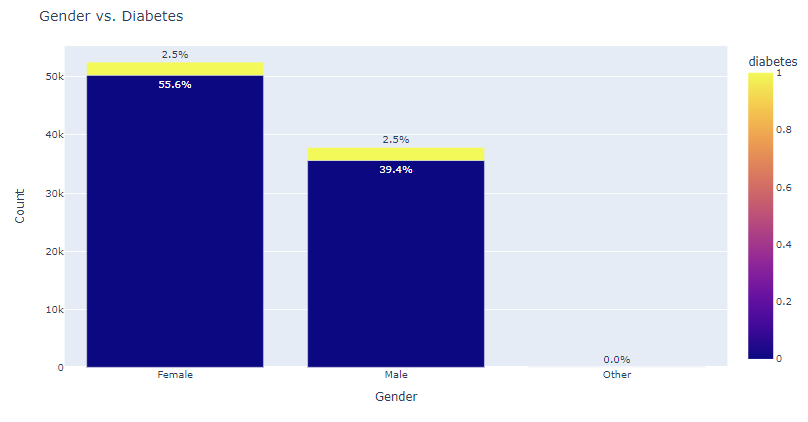

- Observation from this graph:   
    - The data is well-spread out, with majority of the dataset being Female at 58.1% and Male gender at 41.9%.
    
    - We also see that the percentage of Females who are diabetic is 2.5%/58.1% [4.31% of total Females]
    
    - percentage for diabetic Males is 4%/41.9% [5.97% of total Males]. 
    
    - We observe that there DOES NOT exist a significant link between gender and diabetes since the percentage of individuals with diabetes does not difer significantly between genders.
    
    - Hence, we conclude that gender might NOT be a potential indicator

#### Age vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(dData, x="age", color="diabetes", nbins=20, 
                   title="Age Distribution by Diabetes Status",
                   labels={"age": "Age", "count": "Count", "color": "Diabetes"})

fig.show()

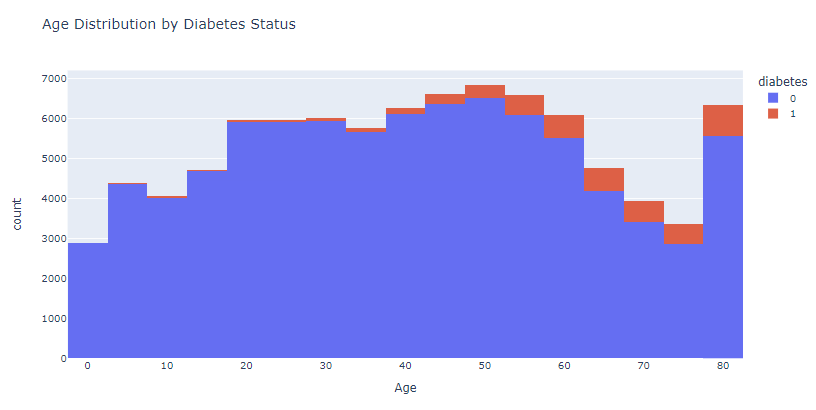

   - We observe that as the age grows, the number of people with diabetes increases as well as the percentage in its respective ranges.

   - Hence, age could be a possible predictor.

#### Hypertension vs Diabetes
***

In [ ]:
# calculate counts and percentages
counts = dData.groupby(['hypertension', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# pLOT the graph
fig = px.bar(counts, x='hypertension', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))
fig.update_layout(title='Hypertension vs. Diabetes', xaxis_title='Hypertension', yaxis_title='Count')

fig.show()

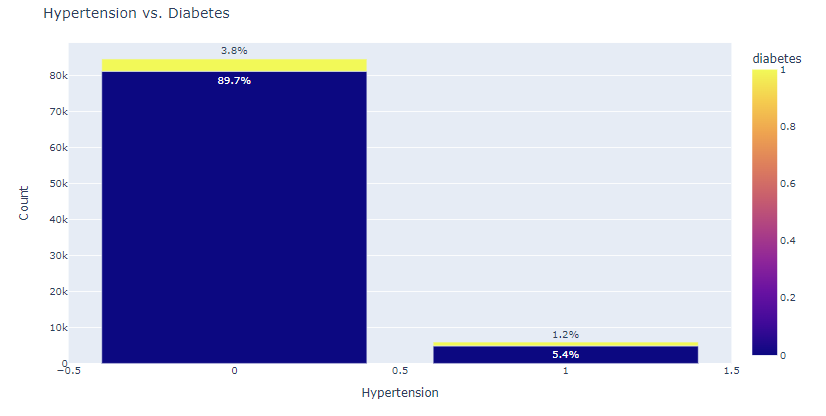

   - We observe that there is a higher percentage of people with diabetes in the group of respondents 

   - Diabetic individuals with hypertension (1.2% out of 6.6%) [15.38%]

   - Diabetic individuals without hypertension (3.8% out of 93.5%) [3.91%] 

   - Hypertension could be a potential predictor for diabetes due to the huge difference in percentage of diabetic individuals.

#### Heart Disease vs Diabetes
***

In [ ]:
# calculate counts and percentages
counts = dData.groupby(['heart_disease', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# create a stacked bar chart with percentage labels
fig = px.bar(counts, x='heart_disease', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))
fig.update_layout(title='Heart Disease vs. Diabetes', xaxis_title='heart_disease', yaxis_title='Count')

fig.show()

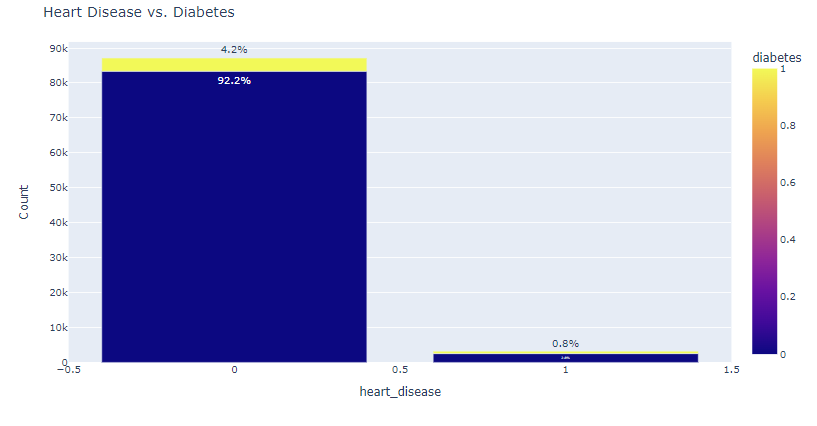


Since people with heart disease have a higher percentage of individuals with diabetes compared to those without heart disease, heart disease might be a potential predictor.

- 0.8% out of 2.8% [22.22%] of people with heart disease have diabetes

 - 4.2% out of 96.6% [4.36%] of people without heart disease have diabetes. 


#### Smoking history vs Diabetes
***

In [ ]:
# create a list of the smoking history categories in the desired order
categories = ['never', 'not current', 'former', 'current',  'ever', 'No Info']

# convert the 'smoking_history' column to a categorical data type with the desired categories and order
dData['smoking_history'] = pd.Categorical(dData['smoking_history'], categories=categories, ordered=True)

# calculate counts and percentages
counts = dData.groupby(['smoking_history', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# create a stacked bar chart with percentage labels
fig = px.bar(counts, x='smoking_history', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))
fig.update_layout(title='Smoking History vs. Diabetes', xaxis_title='smoking_history', yaxis_title='Count')

fig.show()


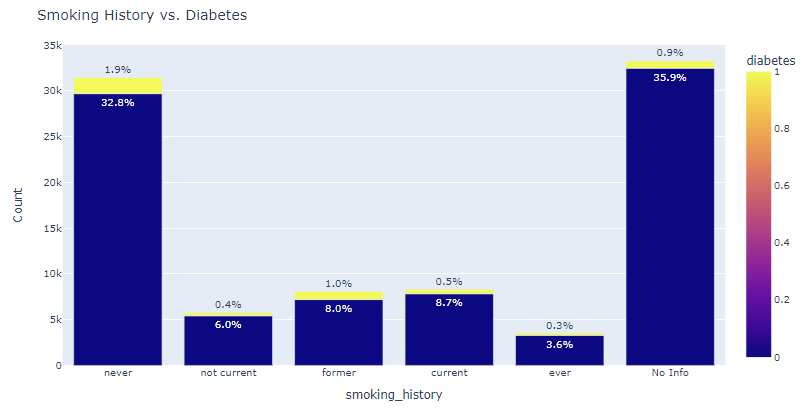

##### Comparing the 6 categories:

> -  Never: The person has never smoked => [5.48%] of total in Never are diabetic
> -  Not Current: The person has never smoked, or has quit smoking more than 12 months ago => [6.25%] of total in Not Current are diabetic
> -  Former: The person used to smoke, but has quit smoking within the last 12 months => [11.11%] of total in Former are diabetic   
> -  Current: The person is currently smoking => [5.43%] of total in Current are diabetic
> -  Ever: The person has smoked at some point in their life, regardless of whether they are currently smoking or not  =>[7.69%] of total in Ever are diabetic
> -  No Info:  There is no information available about the person's smoking history => [2.45%] of total in No Info are diabetic. 
> - Since people who do not have any smoking history have the least percentage of diabetics compared to those that have a smoking history except for people currently smoking, smoking_history has to be carefully examined but is a potential predictor as well.

#### BMI vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(dData, x="bmi", color="diabetes", nbins=20, 
                   title="Bmi Distribution by Diabetes Status",
                   labels={"bmi": "Bmi", "count": "Count", "color": "Diabetes"})

fig.show()

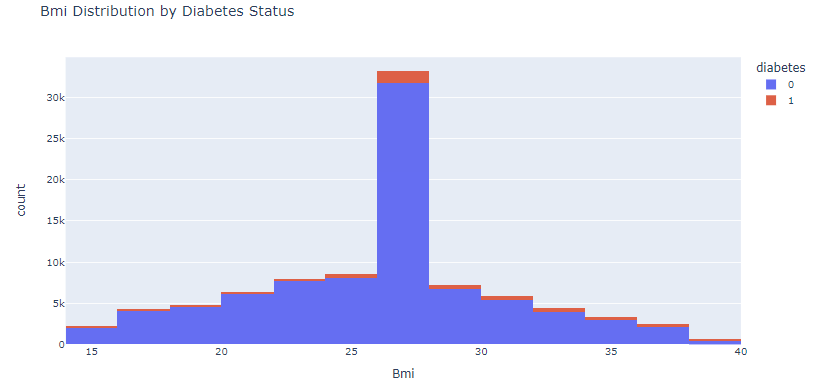

Although there is a significant increase from the number of diabetics from 20 BMI to 30 BMI, there is also a larger sample and hence we need to take a closer look. 

   > From:
   > - 20-21.99 (122/6305 [1.93%])
   > - 22-23.99 (222/7899 [2.81%])
   > - 24-25.99 (379/8444 [4.49%])
   > - 26-27.99 (1427/33107 [4.31%])   
   > - 28-29.99 (525/7151 [7.34%])
   > - 30-31.99 (492/5878 [8.37%])
   > - 32-33.99 (466/4434 [10.51%])
   > - 34-35.99 (402/3284 [12.24%])
   > - 36-37.99 (307/2449 [12.54%])
   > - 38-39.99 (83/509 [16.31%])

We observe that the percentage of diabetics gets higher overall across the graph. 
Hence, BMI is a HIGHLY potential predictor.

#### HbA1c_level vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(dData, x="HbA1c_level", color="diabetes", nbins=20, 
                   title="HbA1c_level Distribution by Diabetes Status",
                   labels={"HbA1c_level": "HbA1c_level", "count": "Count", "color": "Diabetes"})

fig.show()

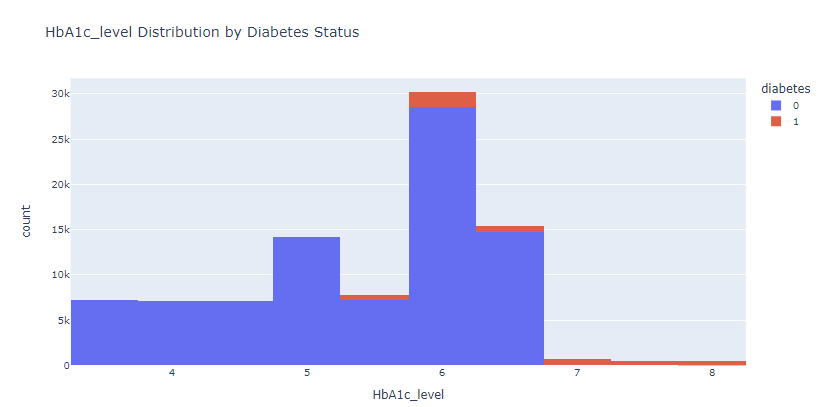

##### HbA1c Level ranges 

   >- Below 5.3 has 0% diabetics 

   >- 5.3-5.7 has 449/7689 [5.84%] diabetics
   
   >- 6 has 1624/30124 [5.39%]

   >- 6.3-6.7 has 805/15466 [5.20%]

   >- Levels above 6.7 indicate 100% in diabetics. 
   >HbA1c level can be a potential predictor but needs to be carefully evaluated due to the obseration that below 5.3% has 0% diabetics while above 6.7% has 100% diabetics. 

#### Blood Glucose Level vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(dData, x="blood_glucose_level", color="diabetes", nbins=20, 
                   title="Blood Glucose Level Distribution by Diabetes Status",
                   labels={"blood_glucose_level": "blood_glucose_level", "count": "Count", "color": "Diabetes"})


fig.show()

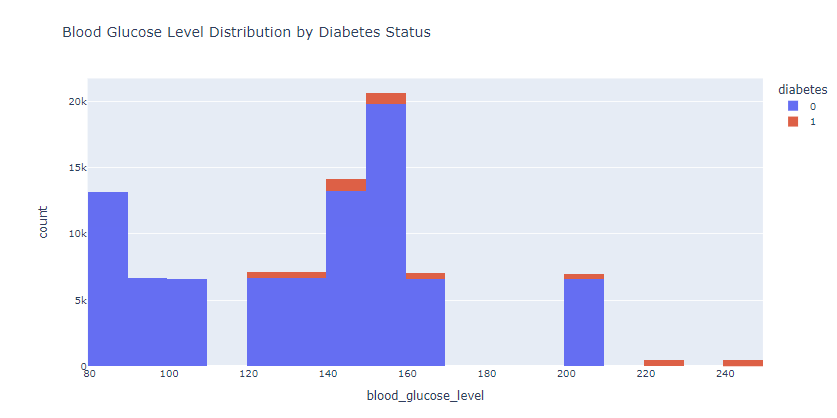

##### The blood glucose levels in the ranges 

   > - Below 120 has 0% diabetics 
   > - 120-139 has 451/7116 [6.34%] diabetics
   > - 140-149 has 892/14148 [6.30%] diabetics
   > - 150-159 has 863/20657 [4.18%] diabetics
   > - 160-169 has 493/7063 [6.98%] diabetics
   > - 170-199 has no data
   > - 200-209 has 455/6995 [6.50%] diabetics
   > - 220-229 has 414/414 [100%] diabetics
   > - 240-249 has 462/462 [100%] diabetics

Although there is a 2% drop in the percentage of diabetics in the 140-149 to 150-159 range, we still observe that there is an overall increase in the percentage of diabetics as the blood glucose level increases
Therefore blood glucose levels can be a potential predictor.


## C) OverSampling
***
> We noticed that the overall data we have is too imbalance, as 95% of our data sets are non-diabetic while 5% are diabetic we conclude that some measures need to be done as with an imbalance data will cause us to not be able to perform well in the predicting of minority class which is our goal (to predict whether a person is diabetic)

> We have found out many ways we can overcome such issue two of the ways are oversampling and undersampling. Finally we had decided to use a mixture of both namely called SMOTETomek algorithm.

> While Oversampling the train data, we choose not to add more data than the ratio of 3:7 to balance our dataset while also keeping as much reliability of the data as possible.

#### Firstly we have to change the categorical form to a numerical form so as to allow SMOTETomek to work

In [30]:
dData['gender_num'] = dData['gender'].map({'Male': 1, 'Female': 0,'Other':2})  # change to numerical

In [31]:
dData['smoking_hist'] = dData['smoking_history'].map({'No Info': 0, 'never': 1,'not current':2,'former':3,'ever':4,'current':5}) 

In [32]:
dData = dData.drop(columns=['gender'])

In [33]:
dData = dData.drop(columns=['smoking_history'])

In [34]:
dData.dtypes

age                    float64
hypertension             int64
heart_disease            int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
gender_num               int64
smoking_hist             int64
dtype: object

#### SMOTE + Tomek Implementation
***

In [35]:
# Separate the data into features and target variable
X = dData.drop('diabetes', axis=1)
y = dData['diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train Before :",X_train.shape)
print("Shope of Y_train Before :",y_train.shape) 

smtom = SMOTETomek(random_state = 43,sampling_strategy={0: int(y_train.value_counts()[0]), 1: int(0.3*y_train.value_counts()[0])})
X_trainresampled,y_trainresampled = smtom.fit_resample(X_train,y_train)

print("Shape of X Train After  :",X_trainresampled.shape)
print("Shope of Y Train Before :",y_trainresampled.shape)

train_resampled_data = pd.concat([X_trainresampled, y_trainresampled], axis=1)
test_data = pd.concat(([X_test,y_test]))

Shape of X_train Before : (72309, 8)
Shope of Y_train Before : (72309,)
Shape of X Train After  : (88655, 8)
Shope of Y Train Before : (88655,)


In [36]:
train_resampled_data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_num,smoking_hist,diabetes
0,46.000000,0,0,23.110000,5.800000,126,0,5,0
1,27.000000,0,0,21.650000,6.000000,159,0,1,0
2,54.000000,0,0,27.320000,6.000000,100,0,0,0
3,29.000000,0,0,25.410000,6.100000,130,1,5,1
4,67.000000,0,0,26.290000,3.500000,126,0,1,0
...,...,...,...,...,...,...,...,...,...
88650,80.000000,0,0,29.059295,6.168482,140,0,2,1
88651,56.276589,0,0,35.219980,6.000000,240,1,2,1
88652,60.841713,0,0,27.305754,6.163315,145,1,0,1
88653,64.872914,0,0,27.649588,6.888960,155,1,3,1


In [37]:
test_data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_num,smoking_hist,0
6014,46.0,0.0,0.0,37.04,4.0,159.0,0.0,1.0,NaN
16063,20.0,0.0,0.0,36.45,6.6,200.0,0.0,1.0,NaN
83740,51.0,0.0,0.0,35.80,4.0,160.0,1.0,1.0,NaN
6531,60.0,0.0,0.0,36.94,4.0,155.0,1.0,3.0,NaN
55274,66.0,0.0,0.0,29.57,8.2,220.0,0.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...
88785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
12115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
37758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [38]:
null_columns = train_resampled_data.columns[train_resampled_data.isnull().any()]
print(train_resampled_data[null_columns].isnull().sum())

Series([], dtype: float64)


In [39]:
train_resampled_data.fillna(0, inplace=True)

In [40]:
train_resampled_data['gender'] = train_resampled_data['gender_num'].map({1:'Male', 0:'Female',2:'Other'})  # change back 
test_data['gender'] = test_data['gender_num'].map({1:'Male', 0:'Female',2:'Other'}) 

In [41]:
train_resampled_data['smoking_history'] = train_resampled_data['smoking_hist'].map({0:'No Info', 1:'never',2:'not current',3:'former',4:'ever',5:'current'}) 
test_data['smoking_history'] = test_data['smoking_hist'].map({0:'No Info', 1:'never',2:'not current',3:'former',4:'ever',5:'current'}) 

In [42]:
train_resampled_data = train_resampled_data.drop(columns = ['gender_num','smoking_hist'])
test_data = test_data.drop(columns = ['gender_num','smoking_hist'])

### What Happens to the train data after OverSampling
*** 
 > based on observation, the oversampling method went according to plan as the amount of diabetic data increase while the trend of these diabetic personnel remain the same comparing to our visualisation from above

#### Diabetes Distribution
***

In [ ]:
diabetes_counts = train_resampled_data['diabetes'].value_counts()

# create a bar graph
fig = px.bar(x=diabetes_counts.index, y=diabetes_counts.values, text=diabetes_counts.values,
             labels={'x': 'Diabetes Status', 'y': 'Count'}, color=diabetes_counts.index)
fig.update_layout(title='Distribution of Diabetes')

fig.show()

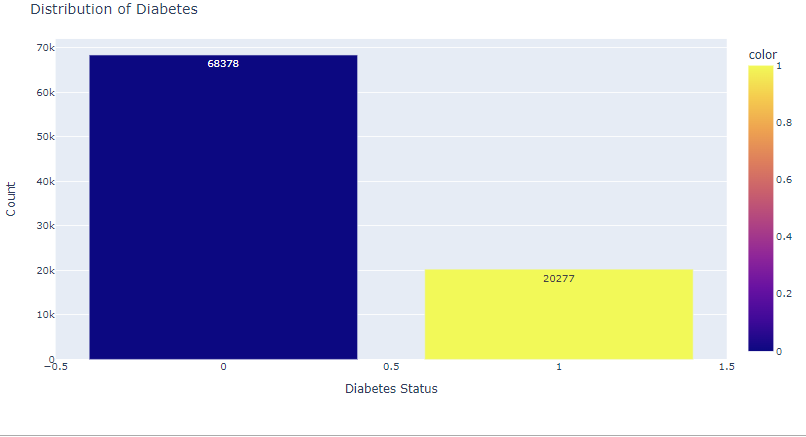

#### Gender Vs Diabetes
***

In [ ]:
# calculate counts and percentages
counts = train_resampled_data.groupby(['gender', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# create a stacked bar chart with percentage labels
fig = px.bar(counts, x='gender', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))
fig.update_layout(title='Gender vs. Diabetes', xaxis_title='Gender', yaxis_title='Count')

fig.show()

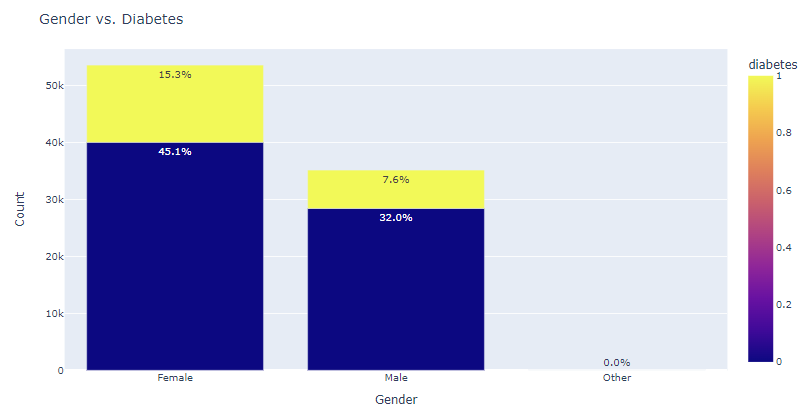

#### Age vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(train_resampled_data, x="age", color="diabetes", nbins=20, 
                   title="Age Distribution by Diabetes Status",
                   labels={"age": "Age", "count": "Count", "color": "Diabetes"})


fig.show()

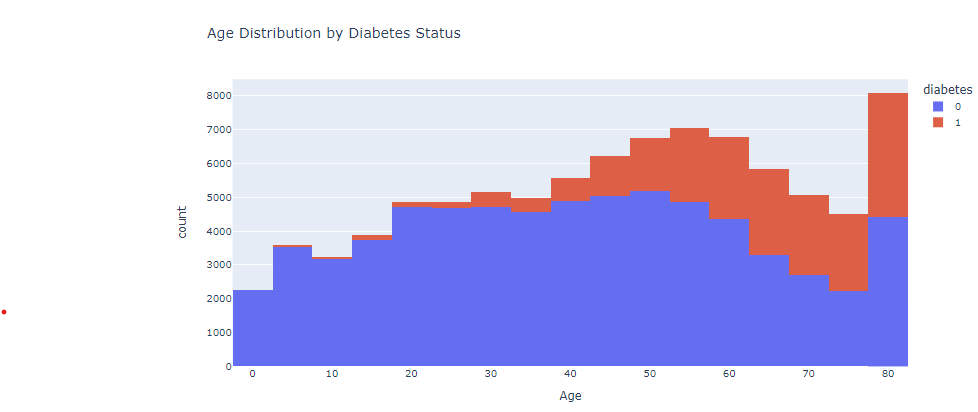

#### Hypertension vs Diabetes
***

In [ ]:
# calculate counts and percentages
counts = train_resampled_data.groupby(['hypertension', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# create a stacked bar chart with percentage labels
fig = px.bar(counts, x='hypertension', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))
fig.update_layout(title='Hypertension vs. Diabetes', xaxis_title='Hypertension', yaxis_title='Count')


fig.show()

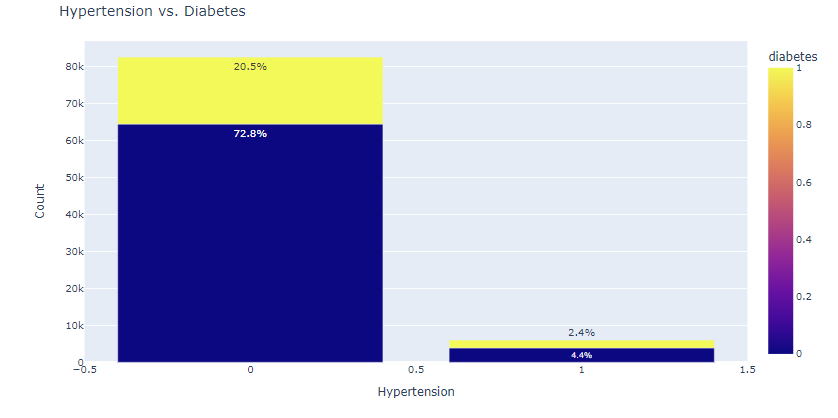

#### Heart Disease vs Diabetes
***

In [ ]:
# calculate counts and percentages
counts = train_resampled_data.groupby(['heart_disease', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# create a stacked bar chart with percentage labels
fig = px.bar(counts, x='heart_disease', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))
fig.update_layout(title='Heart Disease vs. Diabetes', xaxis_title='heart_disease', yaxis_title='Count')


fig.show()

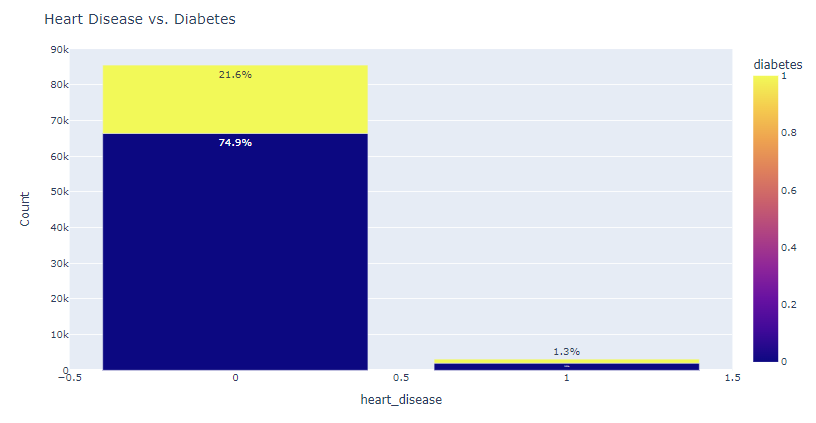

#### Smoking History vs Diabetes
***

In [ ]:
# create a list of the smoking history categories in the desired order
categories = ['never', 'not current', 'former', 'ever',  'current', 'No Info']

# convert the 'smoking_history' column to a categorical data type with the desired categories and order
train_resampled_data['smoking_history'] = pd.Categorical(train_resampled_data['smoking_history'], categories=categories, ordered=True)

# calculate counts and percentages
counts = train_resampled_data.groupby(['smoking_history', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# create a stacked bar chart with percentage labels
fig = px.bar(counts, x='smoking_history', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))

# set the title and axis labels
fig.update_layout(title='Smoking History vs. Diabetes', xaxis_title='smoking_history', yaxis_title='Count')


fig.show()


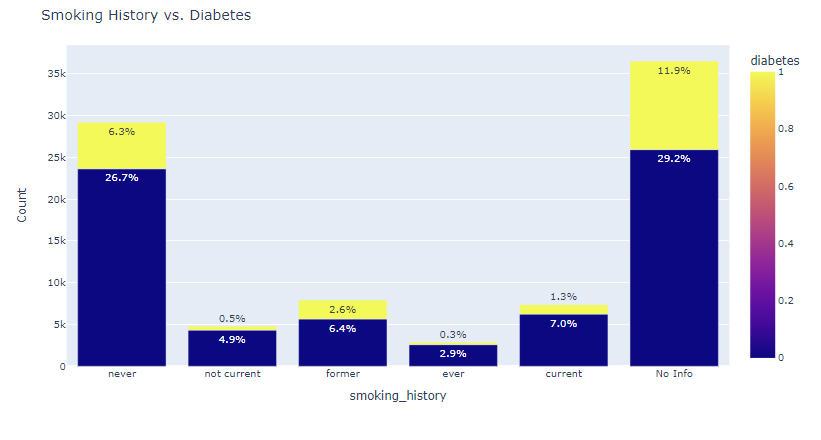

#### BMI vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(train_resampled_data, x="bmi", color="diabetes", nbins=20, 
                   title="Bmi Distribution by Diabetes Status",
                   labels={"bmi": "Bmi", "count": "Count", "color": "Diabetes"})


fig.show()

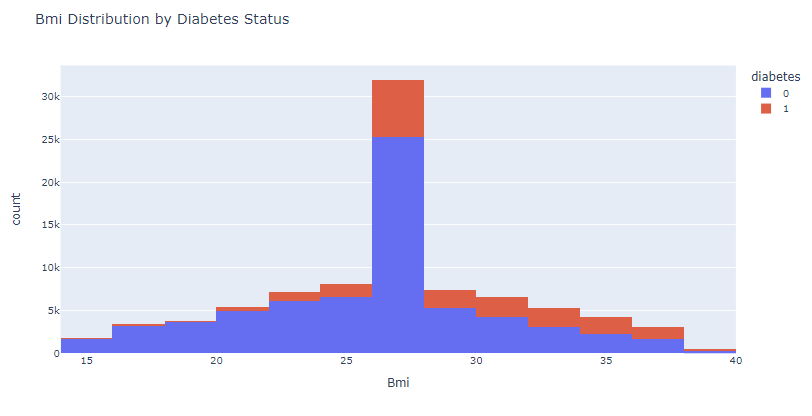

#### HbA1c level vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(train_resampled_data, x="HbA1c_level", color="diabetes", nbins=20, 
                   title="HbA1c_level Distribution by Diabetes Status",
                   labels={"HbA1c_level": "HbA1c_level", "count": "Count", "color": "Diabetes"})


fig.show()

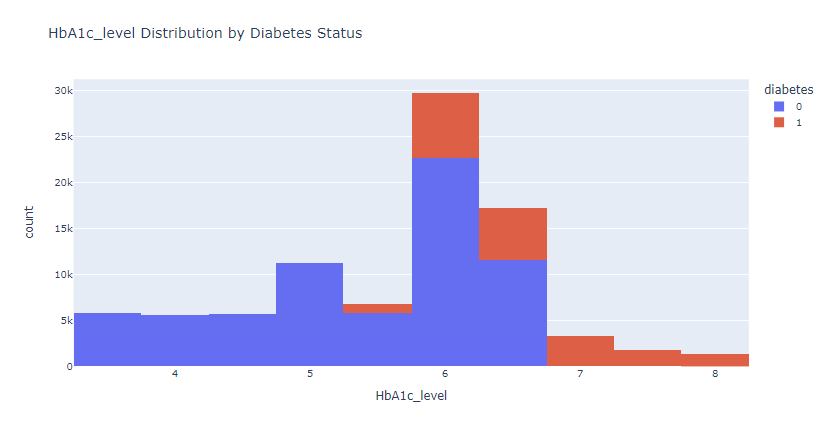

#### Blood Glucose Level vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(train_resampled_data, x="blood_glucose_level", color="diabetes", nbins=20, 
                   title="Blood Glucose Level Distribution by Diabetes Status",
                   labels={"blood_glucose_level": "blood_glucose_level", "count": "Count", "color": "Diabetes"})

# show the plot
fig.show()

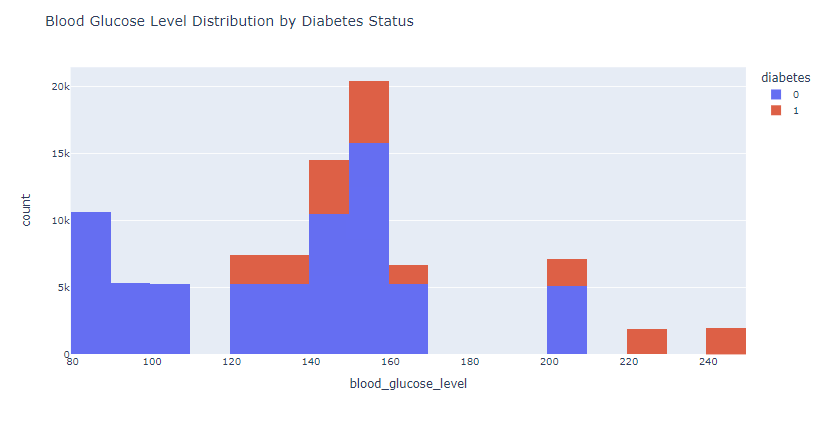

#### Correlation of Trained Data After OverSampling Method
***
 > As observed the variables with the highest correlation would be the HbA1c Level(0.48), followed by Age (0.40) and then Blood Glucose Level (0.38)

Pearson's correlation coefficients:
 age                    0.399223
hypertension           0.081800
heart_disease          0.059614
bmi                    0.276905
HbA1c_level            0.476294
blood_glucose_level    0.383878
diabetes               1.000000
Name: diabetes, dtype: float64

Spearman's correlation coefficients:
 age                    0.405342
hypertension           0.081800
heart_disease          0.059614
bmi                    0.267784
HbA1c_level            0.478931
blood_glucose_level    0.312678
diabetes               1.000000
Name: diabetes, dtype: float64


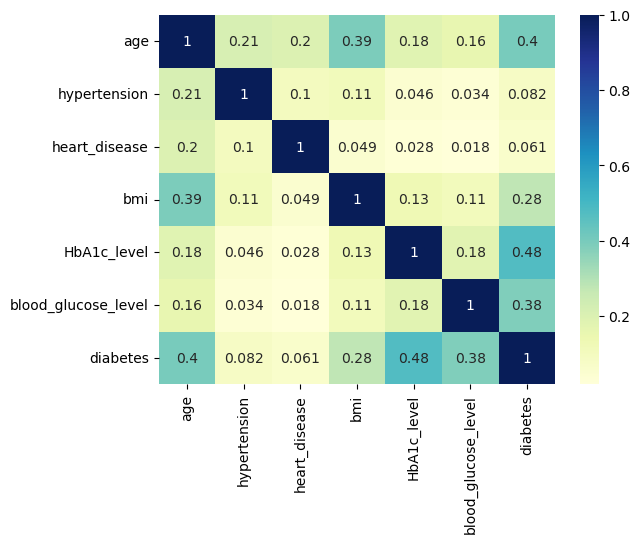

In [43]:
# Separate the data into two groups based on the value of the target variable
diabetes_group = train_resampled_data[train_resampled_data['diabetes'] == 1]
no_diabetes_group = train_resampled_data[train_resampled_data['diabetes'] == 0]

# Split each group into training and testing sets using stratified sampling
diabetes_train, diabetes_test = train_test_split(diabetes_group, test_size=0.2, random_state=42)
no_diabetes_train, no_diabetes_test = train_test_split(no_diabetes_group, test_size=0.2, random_state=42)

# Combine the training and testing sets for both groups
train_data = pd.concat([diabetes_train, no_diabetes_train])
test_data = pd.concat([diabetes_test, no_diabetes_test])

# Split the data into features and target variable
X_train = train_data.drop('diabetes', axis=1)
y_train = train_data['diabetes']
X_test = test_data.drop('diabetes', axis=1)
y_test = test_data['diabetes']

# Concatenate the target variable column to the feature matrix for the training set
train_data_with_target = pd.concat([X_train, y_train], axis=1)

# Calculate the correlation matrix
correlation_matrix = train_data_with_target.corr(numeric_only=True)

# Plot the correlation matrix
sb.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')

# Methods of correlation
pearson_corr = train_resampled_data.corr(method='pearson', numeric_only=True)['diabetes']
spearman_corr = train_resampled_data.corr(method='spearman', numeric_only=True)['diabetes']

print("Pearson's correlation coefficients:\n", pearson_corr)
print("\nSpearman's correlation coefficients:\n", spearman_corr)

## D) Checking Variables and Comparing Models
***
 > By comparing the coefficient and the classification report for each matrix we would like to evaluate each models through the following steps:
 > - Step 1: We would train the model with the data set train_resampled_data with the model chosen, tt
 > - Step 2: Plot out the neccessary graphs to visualise the correlation/the outcome of putting trained against test data
 > - Step 3: Evaluate the relationship between variables
 > - Step 4: Evaluate the model's performance
 > - Step 5: Compare the models' performances and relationship between the predictors and response variable
 
 > We have chosen to focus on 4 variables age, bmi, HbA1c , blood_glucose_level as they have the highest correlation while we choose to ignore hypertension and heart disease due to its minute positive data and its close to 0 correelation. We also chose to ignore the smoking history as there no information makes up about 36.8%.

#### Defining the performance metrics:
    
   > - Precision: 
        A measure of the model's ability to correctly predict positive cases out of all instances predicted as positive. It is calculated as the proportion of true positives among the predicted positives (true positive + false positive).
    
   > - Recall:
        A measure of the model's ability to correctly predict positive cases out of all actual positive instances. It is calculated as the proportion of true positives among the actual positives (true positives + false negatives).
    
   > - F1-Score:
        A harmonic mean of precision and recall, which gives a balance between the two metrics. It ranges between 0 and 1, with 1 indicating the best possible performance.
        
   > - Support:
         Represents the number of instances or observations in the test set that belong to each class. It shows the number of true positives + false negative instances for each class.
         
   > - Accuracy: 
         A measure of the overall performance of the model in terms of correctly predicting both positive and negative cases. It is calculated as the proportion of correct predictions (true positives+true negatives) out of all predictions.
     
   >- Macro-average:
         A useful metric when the class distribution is relatively balanced as it calculates the average of prevision, recall and F1-score for each class separately and then takes the average of those averages, giving each class equal importance, regardless of the number of instances in each class.
     
   >- Weighted-average:
         A useful metric when the class distribution is imbalanced as it calculates teh average of precision, recall and F1-swcore for each class separately, but the average is weighted by the number of instances in each class, giving more importance to larger classes.
     
 
     
   

In [43]:
predictors = ['HbA1c_level', 'blood_glucose_level', 'age', 'bmi']
# Split the data into training and testing sets
X_train = train_resampled_data[predictors]
y_train = train_resampled_data['diabetes']           

X_test = test_data[predictors]
y_test =  test_data['diabetes']  


### Fine-Tuning

We chose GridSearchCV to fine-tune our machine learning models and incorportated it into all of them in a similar manner. This tool involved selecting a range of hyperparameters to test and coming up with the best combination of hyperparameters which is not immediately apparent to us. By systematically testing different combinations of hyperparameters, GridSearchCV helps identify the optimal set of hyperparameters that maximizes the performance of the specific model and provide the most accurate information regarding the dataset.

### Machine Learning Model 1: Logistic Regression
***
Our first machine learning model would be logistic regression which is a commonly used method for analyzing and modeling binary outcomes, which in this case is whether or not a person has diabetes. Although, a logistic regression assumes a linear relationship between the predictor and response variable, since we used gridsearch to finetune our model, even though the code does not explicitly include nonlinear terms, the inclusion of the best hyperparameters found by the gridsearch accounts for some degree of nonlinearity in the data.


Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}



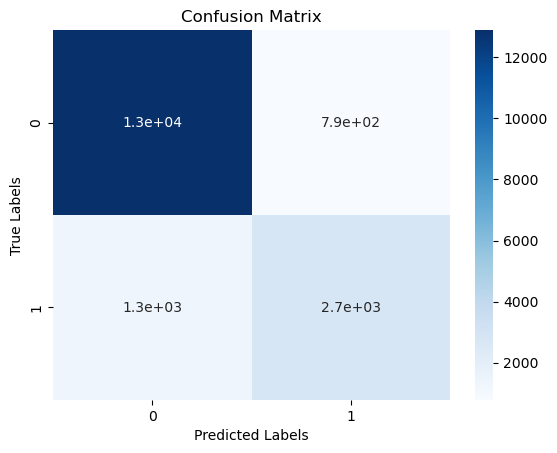

              precision    recall  f1-score   support

    Diabetes       0.78      0.68      0.72      4056
 No Diabetes       0.91      0.94      0.92     13676

    accuracy                           0.88     17732
   macro avg       0.84      0.81      0.82     17732
weighted avg       0.88      0.88      0.88     17732

Accuracy: 0.8813444619896232
 
HbA1c_level : 2.2185609082576256
blood_glucose_level : 0.026593136694276667
age : 0.05251014360796678
bmi : 0.11619166534473742

Macro-average Precision: 0.8418977397795607
Macro-average Recall: 0.809135037235359
Macro-average F1-score: 0.8236214857075081

Weighted-average Precision: 0.8774693059269925
Weighted-average Recall: 0.8813444619896232
Weighted-average F1-score: 0.8783627151864067

 
Predictor: HbA1c_level
Precision: 0.7873650832943615
Recall: 0.6988420492970095
F1-score: 0.740467215219092
Support: 26646.74569296973
 
Predictor: blood_glucose_level
Precision: 0.7868211643166271
Recall: 0.7163362063869282
F1-score: 0.74992612

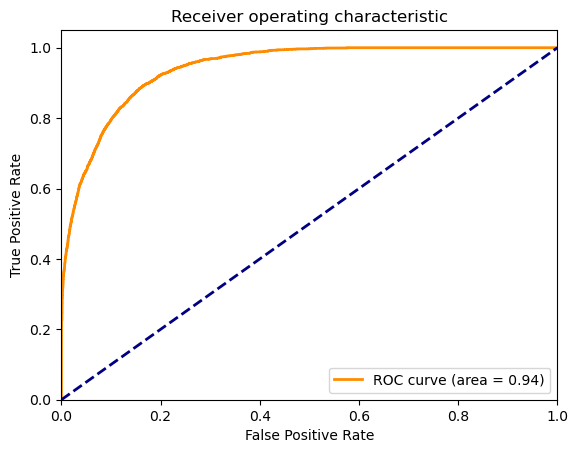

AUC score: 0.9411488737234148


In [44]:

# Create the logistic regression model
model = LogisticRegression()

# Define the hyperparameters to tune
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best Hyperparameters:', grid_search.best_params_)
print()

# Create the logistic regression model with the best hyperparameters
model = LogisticRegression(**grid_search.best_params_, max_iter=1000)


# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sb.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Display the classification report
report = classification_report(y_test, y_pred, labels=[1, 0], target_names=['Diabetes', 'No Diabetes'], zero_division=1)
print(report)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(" ")

# Check for the coeeficient of each variable
coeff = model.coef_
for i in range(len(coeff[0])):
    print(predictors[i],":",coeff[0][i])
print()

# Calculate the macro-average precision, recall, and F1-score
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Macro-average Precision:", macro_precision)
print("Macro-average Recall:", macro_recall)
print("Macro-average F1-score:", macro_f1)

# Calculate the weighted-average precision, recall, and F1-score
weighted_precision = precision_score(y_test, y_pred, average='weighted')
weighted_recall = recall_score(y_test, y_pred, average='weighted')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print()
print("Weighted-average Precision:", weighted_precision)
print("Weighted-average Recall:", weighted_recall)
print("Weighted-average F1-score:", weighted_f1)
print()

# Calculate and print precision, recall, F1-score, and support for each predictor
for predictor in predictors:
    report = classification_report(y_test, y_pred, labels=[1, 0], target_names=['Diabetes', 'No Diabetes'], zero_division=1, 
                                    sample_weight=X_test[predictor], output_dict=True)
    precision = report['Diabetes']['precision']
    recall = report['Diabetes']['recall']
    f1 = report['Diabetes']['f1-score']
    support = report['Diabetes']['support']
    print(" ")
    print("Predictor:", predictor)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Support:", support)

# Make predictions on the testing set
y_scores = model.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC score:", roc_auc)

### Evaluating relationship between predictors and response variable

- Based on the coefficient scores, the predictor with the highest coefficient value is HbA1c_level (2.34), which means that it has the highest impact on the model's predictions. The predictor with the second highest coefficient value is bmi, followed by age and lastly blood_glucose level . This allows us to conclude that from this model, the best predictor for an individual on whether or not he or she may get diabetes would be by judging the HbA1c levels. The second physical predictor would be judging one's BMI. We can also see that the coefficient score of HbA1c_level is significantly higher than the second predictor (about 17 times) and so on and so forth. This shows that HbA1c_level has a strong positive relationship with an individual having diabetes, followed by BMI having a moderate positive relationship and age and blood glucose level having weak positive relationships with the response variable.

### Evaluating performance of logistic regression model    
***

We can see that the logistic regression model has an overall accuracy of 87.95%, which indicates that high performance overall. 

Comparing the precision, recall and F1-scores across the predictors, we see that it is consistent with minute differences. Therefore, we choose to look at the overall scores. 

The metrics show that for the class "Diabetes", the precision is 0.77, which means that out of all the instances predicted as "Diabetes", 77% were actually "Diabetes". The recall is 0.68, which means that out of all the instances that were actually "Diabetes", the model correctly predicted 68% of them as "Diabetes". The F1-score is 0.72, which is the harmonic mean of precision and recall, and provides a balance between the two metrics. 
    
On the other hand, the metrics show that for the class "No Diabetes", the precision is 0.91, which means that out of all the instances predicted as "No Diabetes", 91% were actually "No Diabetes". The recall is 0.94, which means that out of all the instances that were actually "No Diabetes", the model correctly predicted 94% of them as "No Diabetes". The F1-score is 0.92. 
   
Comparing between the two classes, the support value for class "Diabetes" is relatively lower than that of the class "No Diabetes" (The support value of "No Diabetes" is 3 times bigger than that of class "Diabetes") showing that there is an imbalance in the number of instances with a greater weight being on the latter class.
    
Since the class distribution is imbalanced, we will be looking at the weighted-average metric. For the model, the value is 0.88 which is considered high which is a good indication for the overall performance of the model, reinforcing the high accuracy score as well. Therefore, this suggests that the model is effective in establishing relationships between the predictors and response variable, even in an imbalanced dataset.
    
Furthermore, finetuning with GridSearchCV tested different combinations of hyperparameters, including those that can account for the degree of nonlinearity in the data to produce the most accurate and interpretable model. The hyperparameters that were fine-tuned were parameter which speicfies the type of regularization to be applied to the model, C which controls the inverse of the regularization strength and solver which specifies the algorithm to solve the optimization problem. This therefore, increased the reliability of the result produced by this model.

### Machine Learning Model 2: Decision Tree
***
Our Machine learning model 1, logistic regression while it take into account of a non-linear relation to a certain extend as mentioned above.It is ultimately still a linear model therefore we decide to use another type of model that considers a non - linear relation. Decision treecan capture non-linear relationships between the predictors and the binary outcome variable. Furthermore Decision tree are scalable and be used for our data sets with large amount of data. Finally with the decision tree we can take note and track why the model make a certain decision in classifying the test data.

Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9082623653488241
True Positive Rate 		: 0.7232332199043251
False Positive Rate 		: 0.03686858346251718

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9085269569140537
True Positive Rate 		: 0.7236193293885601
False Positive Rate 		: 0.03663351857268207

Classification Report for Train Dataset
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     68378
           1       0.85      0.72      0.78     20277

    accuracy                           0.91     88655
   macro avg       0.89      0.84      0.86     88655
weighted avg       0.91      0.91      0.91     88655


Classification Report for Test Dataset
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     13676
           1       0.85      0.7

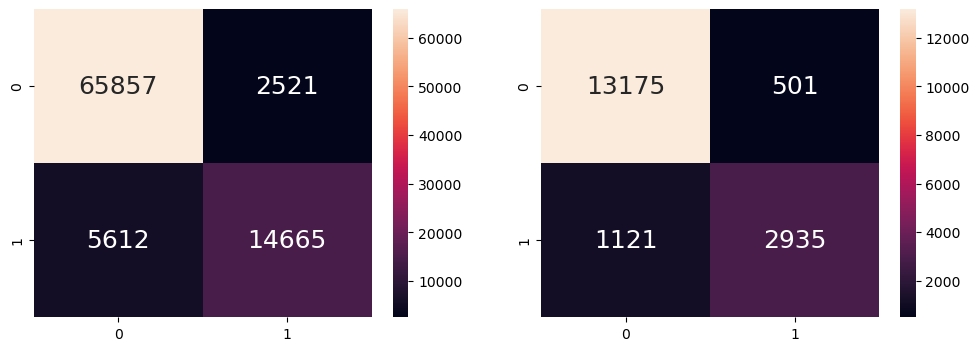

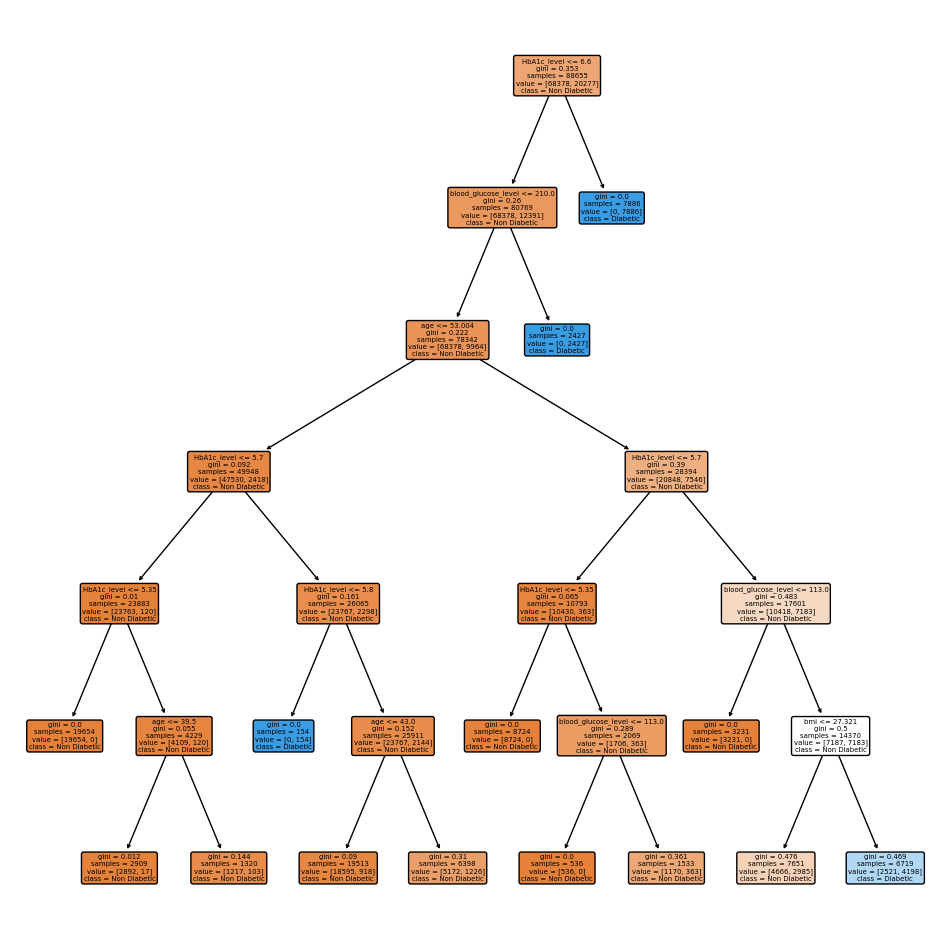

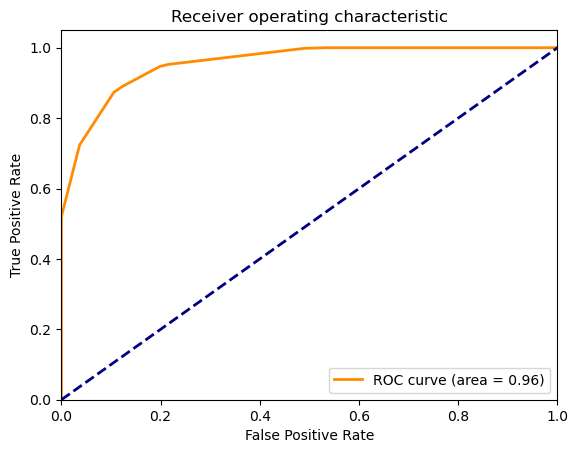

AUC score: 0.9563808494473107


In [45]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}

dectree = DecisionTreeClassifier()
grid_search = GridSearchCV(dectree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
dectree = DecisionTreeClassifier(**best_params)

# Decision Tree using Train Data 
dectree.fit(X_train, y_train)               # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

train_cnf_matrix = confusion_matrix(y_train, y_train_pred)
train_TP = train_cnf_matrix[1, 1]
train_FP = train_cnf_matrix[0, 1]
train_TN = train_cnf_matrix[0, 0]
train_FN = train_cnf_matrix[1, 0]

test_cnf_matrix = confusion_matrix(y_test, y_test_pred)
test_TP = test_cnf_matrix[1, 1]
test_FP = test_cnf_matrix[0, 1]
test_TN = test_cnf_matrix[0, 0]
test_FN = test_cnf_matrix[1, 0]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Positive Rate \t\t:", train_TP / (train_TP + train_FN))
print("False Positive Rate \t\t:", train_FP / (train_FP + train_TN))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Positive Rate \t\t:", test_TP / (test_TP + test_FN))
print("False Positive Rate \t\t:", test_FP / (test_FP + test_TN))
print()

# Print the classification report for Train and Test
print("Classification Report for Train Dataset")
print(classification_report(y_train, y_train_pred))
print()
print("Classification Report for Test Dataset")
print(classification_report(y_test, y_test_pred))

#Print the importance
importances = dectree.feature_importances_
for feature, importance in zip(X_train.columns, importances):
    print(feature, importance)


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12, 12))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=X_train.columns,
          class_names=["Non Diabetic", "Diabetic"])

# Make predictions on the testing set
y_scores = dectree.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC score:", roc_auc)

### Evaluating Relationships between predictors and response variable

   -  For this model, there is a new metric called the importance score. Importance score is a measure of the relative importance of a feature in a non-linear model, in this case gradient boosting. This feature shows the contribution of each variable to the model's performance in predicting the outcome. It is calculated as the reduction in the impurity of increase in the information gain resulting from the inclusion of the feature in the model. It can also be used to rank the predictors by their importance, with the most important predictor having the highest score.
   -  Based on the importance score of each variables in this decision tree model. The variable that hold the most importance is HbA1c_level having the highest impact on the predictor. The second ranked variable would be the blood glucose level followed by age then bmi. This helps us to conclude that the best predictor would be the HbA1c_level and it is significantly higher than all three other predictors. while bmi having the least importance would be the worst predictor in the case of this decision tree model

### Evaluating performance of Decision Tree model

 - Firstly the accuracy of this decision tree model is 0.908 which can be considered as a good value indicating that this model can be effective in predicting the diabetes response
 - For the response class 'Diabetes' the precision of this data set showed that it predicted 91% correctly as its weighted average was 0.91. The recall was 0.91 and f1-score was also 0.91 which shows that this model have the ability to predict the positive class which is our aim and f1-score of this level shows the harmonious relation and overall the model did well in prediction the response.
 - Additionally, the fine-tuning using GridSearchCV trained the model by choosing the best combination of hyperparameters. Some of the hyperparamters that were tuned were the maximum depth of the devision tree, minimum number pf samples required to split and internal node or to be at a lead node and the "criterion" function that measures the quality of a split.
 - However, we still want to continue to explore other type of model with a similar foundation of using decision trees as with a accuracy of 0.908 which is higher than that of the first model, we believe that the results of the relationships of the predictors and outcome variable are more reliable through this form of training.

# Machine Learning Model 3: Gradient Boosting Classifier

We chose Gradient Boosting Classifier as one of our models as it is able to handle complex relationships, high-dimensional data, imbalanced class distributions and provides interpretable results. We found this model relevant and useful in analysing this dataset.

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best accuracy:  0.9708758671253737


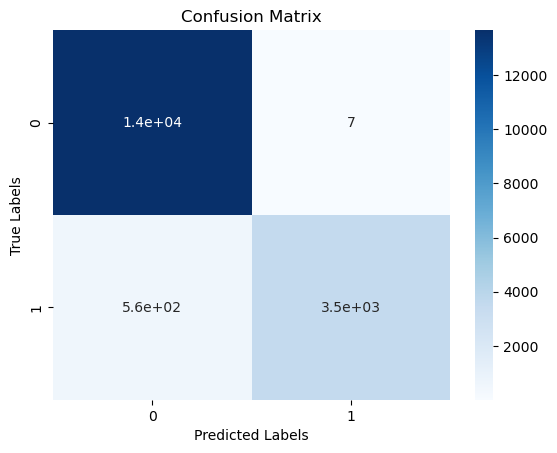

              precision    recall  f1-score   support

    Diabetes       1.00      0.86      0.93      4056
 No Diabetes       0.96      1.00      0.98     13676

    accuracy                           0.97     17732
   macro avg       0.98      0.93      0.95     17732
weighted avg       0.97      0.97      0.97     17732

Accuracy: 0.97
Macro-average Precision: 0.9794930004117216
Macro-average Recall: 0.9313269174522465
Macro-average F1-score: 0.9527786591456606
 
Weighted-average Precision: 0.9694500716449641
Weighted-average Recall: 0.9683058876607263
Weighted-average F1-score: 0.9674690543379237
 
Predictor: HbA1c_level
Precision: 0.9981804464783047
Recall: 0.8729028325595809
F1-score: 0.9313476838770435
Support: 26646.74569296973
 
Predictor: blood_glucose_level
Precision: 0.9981812639878481
Recall: 0.8760138450442781
F1-score: 0.9331158777473512
Support: 676632.0
 
Predictor: age
Precision: 0.9974758687318555
Recall: 0.8672559341347188
F1-score: 0.9278190729455617
Support: 2519

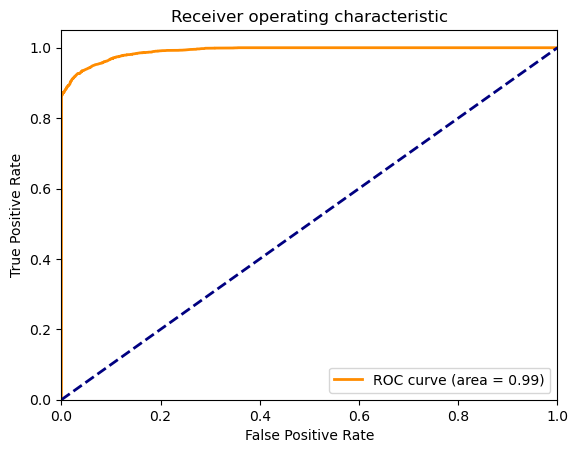

AUC score: 0.9907899075851215


In [46]:

gb_clf = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(gb_clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Train the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)
gb_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sb.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Display the classification report
report = classification_report(y_test, y_pred, labels=[1, 0], target_names=['Diabetes', 'No Diabetes'], zero_division=1)
print(report)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# Calculate the macro-average precision, recall, and F1-score
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Macro-average Precision:", macro_precision)
print("Macro-average Recall:", macro_recall)
print("Macro-average F1-score:", macro_f1)

# Calculate the weighted-average precision, recall, and F1-score
weighted_precision = precision_score(y_test, y_pred, average='weighted')
weighted_recall = recall_score(y_test, y_pred, average='weighted')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print (" ")
print("Weighted-average Precision:", weighted_precision)
print("Weighted-average Recall:", weighted_recall)
print("Weighted-average F1-score:", weighted_f1)

# Calculate and print precision, recall, F1-score, and support for each predictor
for predictor in predictors:
    report = classification_report(y_test, y_pred, labels=[1, 0], target_names=['Diabetes', 'No Diabetes'], zero_division=1, 
                                    sample_weight=X_test[predictor], output_dict=True)
    precision = report['Diabetes']['precision']
    recall = report['Diabetes']['recall']
    f1 = report['Diabetes']['f1-score']
    support = report['Diabetes']['support']
    print(" ")
    print("Predictor:", predictor)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Support:", support)
    
# Compute the feature importance scores
importance_scores = pd.DataFrame(gb_clf.feature_importances_, index=predictors, columns=['Importance Score'])

# Display the importance scores
print(importance_scores)

# Rank the features by their importance score
importance_scores['Absolute Score'] = abs(importance_scores['Importance Score'])
importance_scores_ranked = importance_scores.sort_values('Absolute Score', ascending=False)

# Display the ranked features
print(importance_scores_ranked)

# Make predictions on the testing set
y_scores = gb_clf.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC score:", roc_auc)

### Evaluating the relationship between the predictors and response variable

### -  Comparing the importance scores of the predictors, we can see that HbA1c_level is the most important predictor in predicting the outcome of whether or not one may get diabetes with the higest score of 0.698, followed by blood_glucose_level with an importance score of 0.188, age with a score of 0.098 and finally bmi with an importance score of 0.016. The absolute scores provide the same information as the importance scores but with all scores normalized to sum up to 1.0.

### Evaluating performance of Gradient Boosting Classifier model

   - Firstly, the model achieved and overall accuracy of 0.97 indicating that it accurately predicted the outcome for 97% of the samples, a very high percentage in terms of accuracy of the model.

   - For the "Diabetes" class, the model achieved a precision of 1.00 telling us that it correctly predicted all cases of this class. Recall was 0.86 and F1-score was 0.93 showing that this model prodcues results that have high values in terms of the accuracy of predicting the outcome cases. Additionally, the weighted-average precision score is relatively high as well at a value of 0.97. Overall, the model performed well on this dataset, achieving high scores in the difference performance metrics.
    
   - Since we incorportated GridSearchCV for finetuning the model, the model became more robut and interpretable as the accuracy and generalizability increased. The hyperparameters worked with by the tool included the number of trees in the ensemble, the learning rate, the maximum depth of the trees among many others.
    

## Comparing between models

- We used ROC graphs to compare the performance of the models. To compare ROC graphs, we use the Area Under the Curve (AUC) metric which is a measure of the overall performance of the model. A higher AUC value indicates better overall performance of a model in terms of distinguishing between two classes. Since model 3 has the highest AUC value of 0.99, we can conclude that the gradient boosting classifier model has the best overall performance among the three models.In addition to the AUC value, comparing the shape of the ROC curves shows how the last cutve is the closest to the top left corner indicating best performance once again as it has the highest true positive rate for a low false positive rate. 

- In conjunction with the other metrics, especially the weighted-average score, we see from the classification reports that model 3 is the best at training the dataset as it has the highest score values for all.

- In conclusion, Gradient Boosting Classifier is the best model to evaluate our dataset and moving forward, we would use this model to evaluate the relationship between the predictors and outcome variable.